In [1]:
from occiput.Reconstruction.SPECT import SPECT_Static_Scan
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
spect = SPECT_Static_Scan()
spect.set_n_pixels(128,128)
spect.set_gantry_angular_positions(0.0,360.0,64)
spect.load_measurement_from_file('./02_4_Occiput/tew.nii')
spect.load_attenuation_from_file('./02_4_Occiput/attFloat.nii')
spect.set_pixel_size(4.8,4.8)
spect.set_radius(300.0)
spect.set_psf(fwhm0_mm=5.0,depth_dependence=0.008)
spect.set_use_gpu(False)

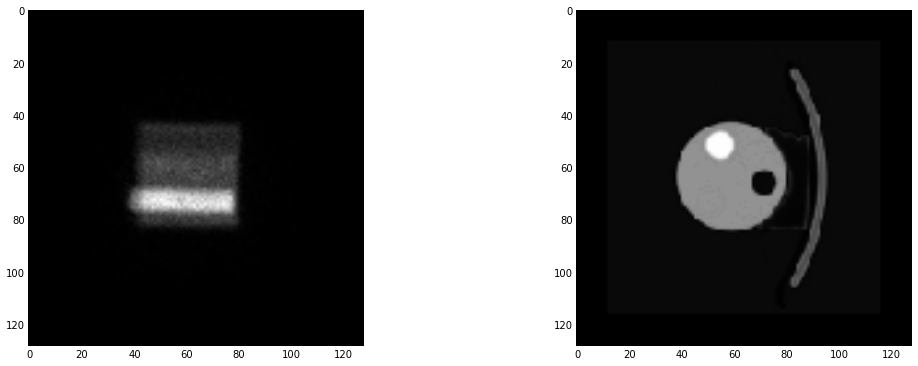

In [17]:
figure(figsize=[18,6])
subplot(1,2,1); imshow(spect._measurement[:,:,0],cmap='gray');
subplot(1,2,2); imshow(spect._attenuation[:,:,64],cmap='gray');

On ré-oriente l'image TDM pour s'aligner avec l'image en émission (sur la projection à 0 $\deg$)

In [32]:
b = numpy.asfortranarray(spect._attenuation.copy())
c = numpy.zeros([128,128,128],order="F")
for i in range(128): 
    c[:,i,:] = flipud(b[:,:,i])
spect._attenuation = c[::-1,:,:]

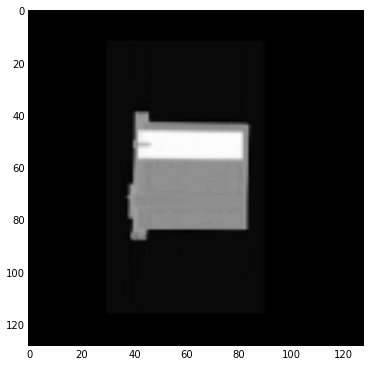

In [33]:
figure(figsize=[18,6])
imshow(spect._attenuation[:,:,55],cmap='gray');

In [34]:
activity = spect.estimate_activity(iterations=2, subset_mode='random',subset_size=64,method='EM')

<IPython.core.display.Javascript object>

Reconstruction methos: EM


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
activity.save_to_file('./02_4_Occiput/recon5.nii')

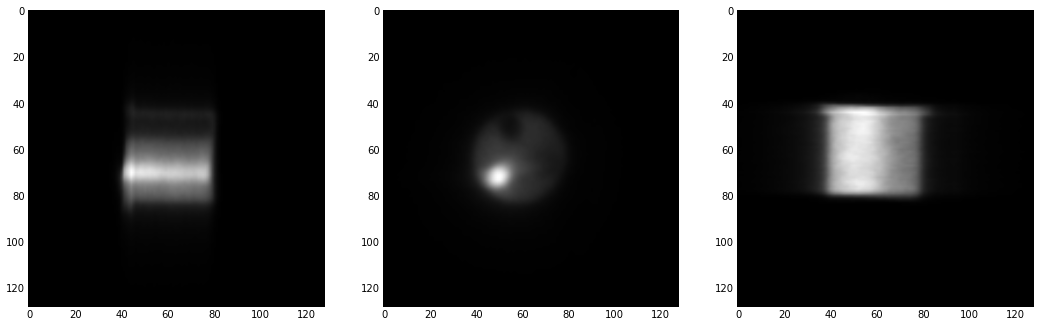

In [35]:
figure(figsize=[18,6])
subplot(131); imshow(activity.data[:,:,55],cmap='gray'); 
subplot(132); imshow(activity.data[:,64,:],cmap='gray'); 
subplot(133); imshow(activity.data[60,:,:],cmap='gray')

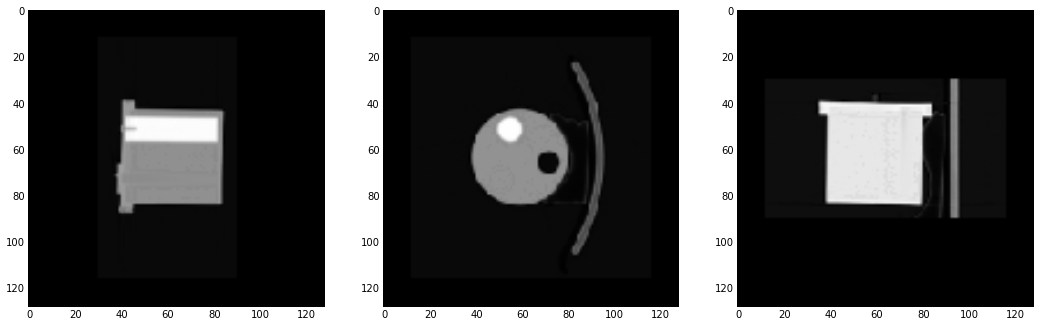

In [37]:
figure(figsize=[18,6])
subplot(131); imshow(spect._attenuation[:,:,55],cmap='gray'); 
subplot(132); imshow(spect._attenuation[:,64,:],cmap='gray'); 
subplot(133); imshow(spect._attenuation[60,:,:],cmap='gray')